<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:**
Семенов Всеволод Алексеевич


**id из контеста:** dap_econ_2022_223

## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Присяга недопрограммиста

Положа руку на сердце, готов поклясться, что все представленные ниже коды были написаны лично мной и только мной, я не копипастил ни одного номера и не взял ни одного фрагмента кода, единственное, что я брал из интернета, это мемы, что отражали моё настроение во время написания (Если иного не указано:) ), любые совпадения с другими кодами случайны и я готов отстаивать эту позицию до последнего

## Успокаивающая музыка

https://youtu.be/0-NW47sXur0 - ещё со школы под это что-то делаю

https://youtu.be/-nAoZ0sb7so - ежели вы так же как и я любите группу "Кино"

https://youtu.be/U_tyfMUSGo4?t=15 - ежели вы так же как и я любите группу "AC-DC"

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

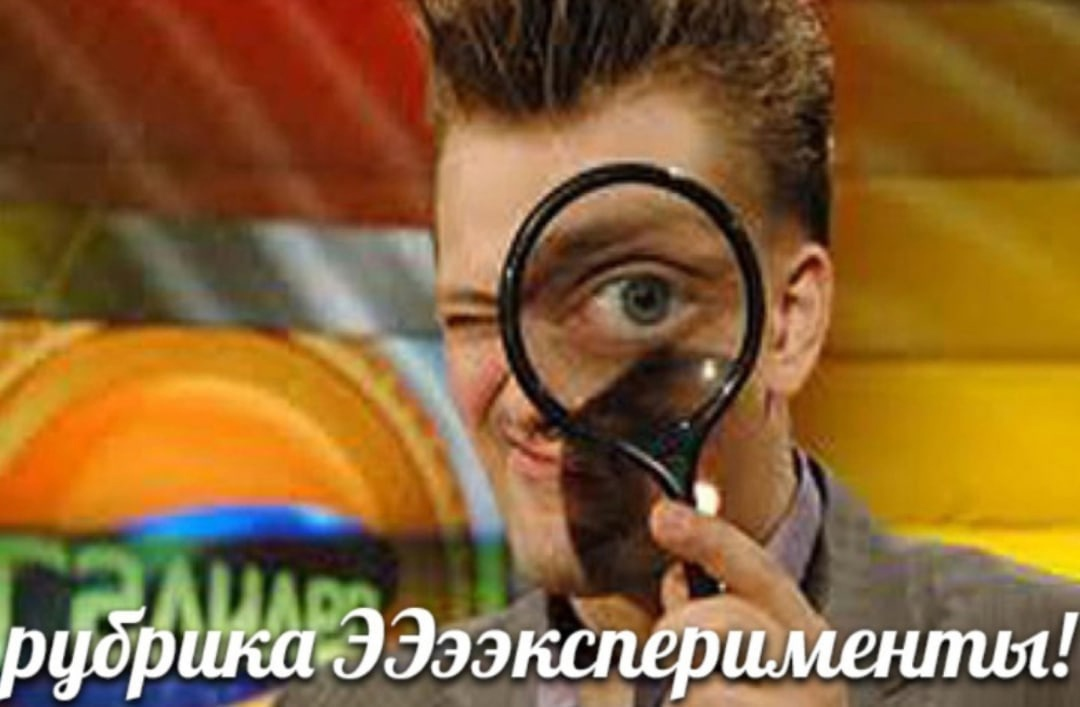

## Импорт необходимых библиотек

Импортируйте все используемые библиотеки здесь.

In [ ]:
# Ваш код здесь

import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, fbeta_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")



# https://youtu.be/9mvm0TlHO4s

## Задача

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций.

## Загрузка данных [5 баллов]

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ваш код здесь

df_gender = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW3_Data/gender.csv') # я работаю в коллабе, можете кидаться помидорами
df_transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW3_Data/transactions.csv', sep="[;]")
df_transactions
#df_gender

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099
...,...,...,...,...
2282462,71902723,290 15:12:09,Агенты и менеджеры по аренде недвижимости,2133.620
2282463,71942984,248 00:00:00,Агенты и менеджеры по аренде недвижимости,1870.848
2282464,71942984,375 00:00:00,Агенты и менеджеры по аренде недвижимости,2466.016
2282465,74289663,27 00:00:00,Агентства по аренде автомобилей,1445.831


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282467 entries, 0 to 2282466
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  int64  
 1   dt       object 
 2   type     object 
 3   value    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 69.7+ MB


In [ ]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  8400 non-null   int64  
 1   gender   8400 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 131.4 KB


In [ ]:
(df_gender['gender'] < 0.5).sum() # быть может этот перевес ещё даст о себе знать

4651

## Подготовка данных [10 баллов]

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций.

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [ ]:
# Ваш код здесь

df_agr = []
df_agr = pd.DataFrame(df_agr)

df_agr['value_sum'] = df_transactions.groupby('user_id')['value'].sum()
df_agr['value_mean'] = df_transactions.groupby('user_id')['value'].mean()
df_agr['value_std'] = df_transactions.groupby('user_id')['value'].std()

df_agr

,value_sum,value_mean,value_std
user_id,,,
22899,274383.315,2143.619648,656.186785
27914,166436.523,2521.765500,415.972053
28753,251578.185,1980.930591,749.304999
31385,717856.052,2323.158744,632.491585
38084,1360028.958,2095.576206,649.030870
...,...,...,...
99953525,159252.786,1608.614000,709.903466
99967537,13026.313,2605.262600,123.013557
99988578,1304612.429,2185.280451,638.235664


In [ ]:
df_agr.isnull().sum() # нанов мало, но они крашат функцию, потому в следующем шаге я их дропну

value_sum      0
value_mean     0
value_std     47
dtype: int64

In [ ]:
LJ = pd.merge(df_agr, df_gender, left_on='user_id', right_on='user_id', how='left')
LJ.isnull().sum()

user_id        0
value_sum      0
value_mean     0
value_std     47
gender         0
dtype: int64

### Отложенная выборка

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [ ]:
# Ваш код здесь

np.random.seed(seed=15)
df_train, df_test = train_test_split(LJ, test_size = 0.2, random_state=42)


In [ ]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки.

In [ ]:
# Ваш код здесь

y_train = df_train['gender']
y_test = df_test['gender']

X_train = df_train[['value_sum', 'value_mean', 'value_std']]
X_test = df_test[['value_sum', 'value_mean', 'value_std']]

In [ ]:
df_train['gender'].isnull().sum()

0

## Обучение и оценка модели [5 баллов]

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [ ]:
# Ваш код здесь

LogReg_0 = LogisticRegression()
LogReg_0.fit(X_train, y_train)

LogReg_0.coef_, LogReg_0.intercept_

(array([[ 1.02869584e-07, -1.28373568e-04, -3.35917841e-05]]),
 array([-5.34894429e-08]))

In [ ]:
p_pp = LogReg_0.predict_proba(X_test)
p_pp

array([[0.54325317, 0.45674683],
       [0.57086192, 0.42913808],
       [0.57121365, 0.42878635],
       ...,
       [0.56658717, 0.43341283],
       [0.53270462, 0.46729538],
       [0.52291033, 0.47708967]])

вероятности почти равны, присутствует перевес на первый класс, это уже плохой знак

In [ ]:
p_pred = p_pp[:, -1]
p_pred

array([0.45674683, 0.42913808, 0.42878635, ..., 0.43341283, 0.46729538,
       0.47708967])

In [ ]:
y_p = 1*(p_pred >= 0.5)
y_p

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
confusion_matrix(y_test, y_p) # как и оговаривалось ранее, крайне много ошибок первого рода, второй гендер угадался всего раз, получилась матрица ошибок курильщика

array([[924,   2],
       [729,   1]])

### Валидация

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [ ]:
# Ваш код здесь

accuracy_0 = accuracy_score(y_p, y_test)
precision_0 = precision_score(y_test, y_p)
recall_0 = recall_score(y_test, y_p)
roc_auc_score_0 = roc_auc_score(y_test, p_pred)

accuracy_0, precision_0, recall_0, roc_auc_score_0

(0.5585748792270532,
 0.3333333333333333,
 0.0013698630136986301,
 0.5777463830290837)

### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__

Матрица явно указывает на то, что модель не может угадать один из гендеров

Качество очевидно оставляет желать лучшего, модель не способна отражать то, что мы собственно от неё требуем, возможно более тонкая настройка порога изменит картину, однако это не сильно повлияет на качество самой модели <br>

Из возможных причин низкого качества: отсутствие сильной взаимосвязи между полом и признаками (но это не значит, что её вовсе нет), неправильный порог, перевес одного из полов, простота модели, нехватка признаков, рандомное распределение тренировка / тест и т.д.

я и эта модель:

https://youtu.be/tfobnIwGFRw

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [ ]:
df_transactions['type'].nunique()

184

*Примечание от автора:*

быть может теперь признаков слишком много, но зато в них наверняка будут присутствовать отличительные для конкретного пола транзакции, которые смогут выйти в закономерности

In [ ]:
# Ваш код здесь

#LJ1 = pd.merge(df_transactions, df_gender, left_on='user_id', right_on='user_id', how='left')

df_raw = pd.pivot_table(df_transactions,
               index = ['user_id'],
               values = ['value'],
               columns = ['type'],
               aggfunc = np.sum) # если я правильно всё понимаю, то эта функция будет суммировать транзакции на одинаковые категории

LJ1 = pd.merge(df_raw, df_gender, left_on='user_id', right_on='user_id', how='left')

In [ ]:
LJ1

,user_id,"(value, Авиалинии, авиакомпании)","(value, Авиалинии, авиакомпании, нигде более не классифицированные)","(value, Автобусные линии)","(value, Автозапчасти и аксессуары)","(value, Автоматизированные бензозаправки)","(value, Автомойки)","(value, Автошины)","(value, Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка)","(value, Агентства по аренде автомобилей)",...,"(value, Химикалии и смежные вещества, не классифицированные ранее)","(value, Химчистки)","(value, Ценные бумаги: брокеры/дилеры)","(value, Центры здоровья)","(value, Цифровые товары, игры)","(value, Школы — бизнес и секретарей)","(value, Штрафы)","(value, Штучные товары, галантерея и другие текстильные товары)","(value, Электрические части и оборудование)",gender
0,22899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,27914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,28753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,31385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,38084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,99953525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8352,99967537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8353,99988578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4267.24,NaN,NaN,NaN,NaN,1.0
8354,99991245,NaN,NaN,NaN,4446.915,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
LJ1.fillna(0, inplace=True) # чтобы модель мне не крашило
LJ1.isnull().sum()

user_id                                                                0
(value, Авиалинии, авиакомпании)                                       0
(value, Авиалинии, авиакомпании, нигде более не классифицированные)    0
(value, Автобусные линии)                                              0
(value, Автозапчасти и аксессуары)                                     0
                                                                      ..
(value, Школы — бизнес и секретарей)                                   0
(value, Штрафы)                                                        0
(value, Штучные товары, галантерея и другие текстильные товары)        0
(value, Электрические части и оборудование)                            0
gender                                                                 0
Length: 186, dtype: int64

## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [ ]:
# Ваш код здесь

np.random.seed(seed=15)
df_train_1, df_test_1 = train_test_split(LJ1, test_size = 0.2, random_state=42)

In [ ]:
y_train_1 = df_train_1['gender']
y_test_1 = df_test_1['gender']

X_train_1 = df_train_1.drop('gender', axis=1).drop('user_id', axis=1)
X_test_1 = df_test_1.drop('gender', axis=1).drop('user_id', axis=1)

In [ ]:
LogReg_1 = LogisticRegression()
LogReg_1.fit(X_train_1, y_train_1)

#LogReg_1.coef_, LogReg_1.intercept_

LogisticRegression()

In [ ]:
p_pp = LogReg_1.predict_proba(X_test_1) # судя по тому, что теперь вероятности стали сильнее различаться, угадать пол стало несколько проще
p_pp

array([[8.49823093e-01, 1.50176907e-01],
       [4.82387000e-01, 5.17613000e-01],
       [6.06239191e-01, 3.93760809e-01],
       ...,
       [4.94932201e-01, 5.05067799e-01],
       [9.99434525e-01, 5.65475052e-04],
       [5.01026424e-01, 4.98973576e-01]])

In [ ]:
p_pred = p_pp[:, -1]
p_pred

array([0.15017691, 0.517613  , 0.39376081, ..., 0.5050678 , 0.00056548,
       0.49897358])

In [ ]:
y_p = 1*(p_pred >= 0.5)
y_p # появились единички, кажется модель начинает работать

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz

confusion_matrix(y_test_1, y_p) # вот и матрица ошибок здорового человека

array([[736, 198],
       [276, 462]])

In [ ]:
### ╰( ͡◕ ͜ʖ ͡◕ )つ▬▬/═══════  bzzzzzzzzzz

accuracy_1 = accuracy_score(y_p, y_test_1)
precision_1 = precision_score(y_test_1, y_p)
recall_1 = recall_score(y_test_1, y_p)
roc_auc_score_1 = roc_auc_score(y_test_1, p_pred)

accuracy_1, precision_1, recall_1, roc_auc_score_1

(0.7165071770334929, 0.7, 0.6260162601626016, 0.7893954956680187)

### Вывод

Изменилось ли качество модели? Почему?

__Ваш вывод:__

Качество модели значительно изменилось, она начала ошибаться, что хорошо, причём не так уж сильно, что тоже хорошо

Касательно причин данного преображения, возможно это связано с появлением "якорных" признаков, которые имеет только один из гендеров (например дамы редко покупают инструменты, а мужчины - косметику), данные переменные наверняка имеют высокую корелляцию с типом гендера. Второй причиной может быть увеличение количества признаков, что позволяет модели грамотнее распределять веса для различных категорий. Тут наверняка возможно назвать что-то более конкретное, но появления признаков, которые ориентированы на какой-либо пол уже достаточно, чтобы модель хоть как-то заработала. Далее этот промежуточный довод будет раскрыт в полной мере!

*раскрыт в полной мере?*

https://youtu.be/-RlLiKg7pSE

# Часть 3: что мы всё про данные? Давайте про модель
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества.

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов]

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [ ]:
names = LJ1.drop('user_id', axis=1).drop('gender', axis=1).columns
df_raw_2 = LJ1.drop('user_id', axis=1).drop('gender', axis=1)
df_raw_2

,"(value, Авиалинии, авиакомпании)","(value, Авиалинии, авиакомпании, нигде более не классифицированные)","(value, Автобусные линии)","(value, Автозапчасти и аксессуары)","(value, Автоматизированные бензозаправки)","(value, Автомойки)","(value, Автошины)","(value, Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка)","(value, Агентства по аренде автомобилей)","(value, Агенты и менеджеры по аренде недвижимости)",...,"(value, Фотостудии, фотолаборатории)","(value, Химикалии и смежные вещества, не классифицированные ранее)","(value, Химчистки)","(value, Ценные бумаги: брокеры/дилеры)","(value, Центры здоровья)","(value, Цифровые товары, игры)","(value, Школы — бизнес и секретарей)","(value, Штрафы)","(value, Штучные товары, галантерея и другие текстильные товары)","(value, Электрические части и оборудование)"
0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
8352,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
8353,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0
8354,0.0,0.0,0.0,4446.915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [ ]:
n = []
for i in names:
    n.append(i[-1])
 # согрешу, ибо кортежи сложнее переписывать

In [ ]:
# Ваш код здесь

df_raw_2.columns = n

df_raw_2

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
8352,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
8353,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0
8354,0.0,0.0,0.0,4446.915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [ ]:
df_raw_2['gender'] = LJ1['gender']
df_raw_2

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
8352,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
8353,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0
8354,0.0,0.0,0.0,4446.915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0


**Примечание от автора**

Изначально я отнормировал эти данные, но позже намерено откатил всё, т.к. это ломало модель, в результате я решил воспользоваться способом, который нам показали на 9-ом семинаре, нормировка работает, но она представленна позже!!!

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели *логистической* регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у логистической регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [ ]:
# Ваш код здесь (ง ͡ ل͜ ͡)ง

np.random.seed(seed=15)
df_train_2, df_test_2 = train_test_split(df_raw_2, test_size=0.2, stratify=df_raw_2['gender']) # думается, что от этого в качестве модели не убудет*

In [ ]:
y_train_2 = df_train_2['gender']
y_test_2 = df_test_2['gender']

X_train_2 = df_train_2.drop('gender', axis=1)
X_test_2 = df_test_2.drop('gender', axis=1)

In [ ]:
LogReg_2 = LogisticRegression()
LogReg_2.fit(X_train_2, y_train_2)

# LogReg_2.coef_, LogReg_2.intercept_

LogisticRegression()

In [ ]:
y_pred_2 = LogReg_2.predict(X_test_2)
p_pred_2 = LogReg_2.predict_proba(X_test_2)

y_pred_2, p_pred_2

(array([0., 0., 0., ..., 0., 0., 1.]),
 array([[0.50567826, 0.49432174],
        [0.85252067, 0.14747933],
        [0.54079293, 0.45920707],
        ...,
        [0.55230952, 0.44769048],
        [0.90792669, 0.09207331],
        [0.47805356, 0.52194644]]))

In [ ]:
roc_auc_score(y_test_2, p_pred_2[:, -1])

0.7792908470807591

<center>

 ***Эта процедура была сделана для сравнения***

 </center>

In [ ]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'saag', 'saga']

In [ ]:
grid_space={'penalty':['L1', 'L2', 'elasticnet'],
              'C': list(np.logspace(-10, 4, 40))}


In [ ]:
grid_space={'penalty':['L1', 'L2', 'elasticnet', None], # независимо от модели, грид почему-то его всё время убирает, точнее ставит None
              'C': list(np.logspace(-10, 4, 40))}

In [ ]:
alphas = np.logspace(-2, 4, 40)

In [ ]:
pen = ['L1', 'L2', 'elasticnet', None]

In [ ]:
LogReg_21 = LogisticRegression()

In [ ]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), n)]) # оhe нам здесь и не нужен

In [ ]:
model_lr = Pipeline(steps=[
    ('scaling', column_transformer),
    ('regression', LogisticRegression())
])

In [ ]:
# Если solver - liblinear

searcher_lr = GridSearchCV(model_lr, [{"regression__C": alphas}],
                        scoring="roc_auc", cv=4, n_jobs=-1)

searcher_lr.fit(X_train_2, y_train_2)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['Авиалинии, '
                                                                          'авиакомпании',
                                                                          'Авиалинии, '
                                                                          'авиакомпании, '
                                                                          'нигде '
                                                                          'более '
                                                                          'не '
                                                                          'классифицированные',
                                                                          'Автобусные '
                                                                          'линии',
                                                                          'Автозапчасти '
                                                                          'и '
                                                                          'аксессуары',
                                                                          'Автоматизированные '
                                                                          'бензозаправки',
                                                                          'Автомойки',
                                                                          'Автошины',
                                                                          'Агентства '
                                                                          'по '
                                                                          'автотранспортным...
       2.89426612e+00, 4.12462638e+00, 5.87801607e+00, 8.37677640e+00,
       1.19377664e+01, 1.70125428e+01, 2.42446202e+01, 3.45510729e+01,
       4.92388263e+01, 7.01703829e+01, 1.00000000e+02, 1.42510267e+02,
       2.03091762e+02, 2.89426612e+02, 4.12462638e+02, 5.87801607e+02,
       8.37677640e+02, 1.19377664e+03, 1.70125428e+03, 2.42446202e+03,
       3.45510729e+03, 4.92388263e+03, 7.01703829e+03, 1.00000000e+04])}],
             scoring='roc_auc')

In [ ]:
best_p = searcher_lr.best_params_["regression__C"]
best_p

0.01

In [ ]:
searcher_lr = GridSearchCV(model_lr, [{"regression__C": alphas,
                                       "regression__penalty": pen}],
                        scoring="roc_auc", cv=4, n_jobs=-1)

searcher_lr.fit(X_train_2, y_train_2)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['Авиалинии, '
                                                                          'авиакомпании',
                                                                          'Авиалинии, '
                                                                          'авиакомпании, '
                                                                          'нигде '
                                                                          'более '
                                                                          'не '
                                                                          'классифицированные',
                                                                          'Автобусные '
                                                                          'линии',
                                                                          'Автозапчасти '
                                                                          'и '
                                                                          'аксессуары',
                                                                          'Автоматизированные '
                                                                          'бензозаправки',
                                                                          'Автомойки',
                                                                          'Автошины',
                                                                          'Агентства '
                                                                          'по '
                                                                          'автотранспортным...
       1.19377664e+01, 1.70125428e+01, 2.42446202e+01, 3.45510729e+01,
       4.92388263e+01, 7.01703829e+01, 1.00000000e+02, 1.42510267e+02,
       2.03091762e+02, 2.89426612e+02, 4.12462638e+02, 5.87801607e+02,
       8.37677640e+02, 1.19377664e+03, 1.70125428e+03, 2.42446202e+03,
       3.45510729e+03, 4.92388263e+03, 7.01703829e+03, 1.00000000e+04]),
                          'regression__penalty': ['L1', 'L2', 'elasticnet',
                                                  None]}],
             scoring='roc_auc')

In [ ]:
#searcher_lr.cv_results_

In [ ]:
best_pe = searcher_lr.best_params_["regression__penalty"]
best_p = searcher_lr.best_params_["regression__C"]
print(best_p, best_pe)

0.01 None


In [ ]:
# Если solver - saga, она была взята исходя из описания в документации, мне показалось, что подойдёт, но вы сами увидите, что из этго вышло

model_lr_2 = Pipeline(steps=[
    ('scaling', column_transformer),
    ('regression', LogisticRegression(solver='saga'))
])

In [ ]:
searcher_lr_2 = GridSearchCV(model_lr_2, [{"regression__C": alphas,
                                           "regression__penalty": pen}],
                        scoring="roc_auc", cv=4, n_jobs=-1)

searcher_lr_2.fit(X_train_2, y_train_2)


34.551072945922215

In [ ]:
best_pe_2 = searcher_lr_2.best_params_["regression__penalty"]
best_p_2 = searcher_lr_2.best_params_["regression__C"]
print(best_p_2, best_pe_2)

34.551072945922215 None


In [ ]:
# Если solver - lbfgs, его я взял для уверенности

model_lr_22 = Pipeline(steps=[
    ('scaling', column_transformer),
    ('regression', LogisticRegression(solver='lbfgs'))
])

In [ ]:
searcher_lr_22 = GridSearchCV(model_lr_22, [{"regression__C": alphas}], #тут с штрафом можно не играться, т.к. обработает только l2, а он зашит по умолчанию
                        scoring="roc_auc", cv=4, n_jobs=-1)

searcher_lr_22.fit(X_train_2, y_train_2)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['Авиалинии, '
                                                                          'авиакомпании',
                                                                          'Авиалинии, '
                                                                          'авиакомпании, '
                                                                          'нигде '
                                                                          'более '
                                                                          'не '
                                                                          'классифицированные',
                                                                          'Автобусные '
                                                                          'линии',
                                                                          'Автозапчасти '
                                                                          'и '
                                                                          'аксессуары',
                                                                          'Автоматизированные '
                                                                          'бензозаправки',
                                                                          'Автомойки',
                                                                          'Автошины',
                                                                          'Агентства '
                                                                          'по '
                                                                          'автотранспортным...
       2.89426612e+00, 4.12462638e+00, 5.87801607e+00, 8.37677640e+00,
       1.19377664e+01, 1.70125428e+01, 2.42446202e+01, 3.45510729e+01,
       4.92388263e+01, 7.01703829e+01, 1.00000000e+02, 1.42510267e+02,
       2.03091762e+02, 2.89426612e+02, 4.12462638e+02, 5.87801607e+02,
       8.37677640e+02, 1.19377664e+03, 1.70125428e+03, 2.42446202e+03,
       3.45510729e+03, 4.92388263e+03, 7.01703829e+03, 1.00000000e+04])}],
             scoring='roc_auc')

In [ ]:
best_p_22 = searcher_lr_22.best_params_["regression__C"]
print(best_p_22)

0.01


**Примечание от автора**

Знаю, о чём в этот момент можно было подумать, но как говорил Фил: "Я сам это никогда с нуля не пишу, просто копирую", единственное, что я решил никак не менять - это альфы

Тем не менее, хоть этот код крайне *напоминает* тот, что был в семинаре, он несколько отличается зашитыми в него параметрами. Так я напрочь выпилил из него OHE, ибо он знесь не нужен, а также подставил параметры с ТЗ, ну и прогнал через три solver-а (хотя по итогу результат почти не изменился)

P.s. примечание примечания от автора, saga очень долго работает (4 минуты), хотя железо вроде бы не слабое (2600Х 6 ядер / 12 потоков)

Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [ ]:
# Я напишу ещё одни код с солверами в куче, знаю, что долго работает, это своеобразный э-э-э-э-ксперимент

model_lr_23 = Pipeline(steps=[
    ('scaling', column_transformer),
    ('regression', LogisticRegression())
])

searcher_lr_23 = GridSearchCV(model_lr_23, [{"regression__C": alphas,
                                             "regression__penalty": pen,
                                             "regression__solver": solver}],
                              scoring="roc_auc", cv=4, n_jobs=-1)

searcher_lr_23.fit(X_train_2, y_train_2)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['Авиалинии, '
                                                                          'авиакомпании',
                                                                          'Авиалинии, '
                                                                          'авиакомпании, '
                                                                          'нигде '
                                                                          'более '
                                                                          'не '
                                                                          'классифицированные',
                                                                          'Автобусные '
                                                                          'линии',
                                                                          'Автозапчасти '
                                                                          'и '
                                                                          'аксессуары',
                                                                          'Автоматизированные '
                                                                          'бензозаправки',
                                                                          'Автомойки',
                                                                          'Автошины',
                                                                          'Агентства '
                                                                          'по '
                                                                          'автотранспортным...
       4.92388263e+01, 7.01703829e+01, 1.00000000e+02, 1.42510267e+02,
       2.03091762e+02, 2.89426612e+02, 4.12462638e+02, 5.87801607e+02,
       8.37677640e+02, 1.19377664e+03, 1.70125428e+03, 2.42446202e+03,
       3.45510729e+03, 4.92388263e+03, 7.01703829e+03, 1.00000000e+04]),
                          'regression__penalty': ['L1', 'L2', 'elasticnet',
                                                  None],
                          'regression__solver': ['newton-cg', 'lbfgs',
                                                 'liblinear', 'saag',
                                                 'saga']}],
             scoring='roc_auc')

In [ ]:
searcher_lr_23.best_params_

{'regression__C': 412.46263829013566,
 'regression__penalty': None,
 'regression__solver': 'saga'}

In [ ]:
# результаты этого "кучного кода"

p_pred = searcher_lr_23.predict_proba(X_test_2)
roc_auc_score(y_test_2, p_pred[:,-1])

0.7831501630003649

In [ ]:
# Если solver - liblinear, правда если не давать модели право выбора пенальти, то результат будет лучше

p_pred = searcher_lr.predict_proba(X_test_2)
roc_auc_score(y_test_2, p_pred[:,-1])

0.7812089241975924

In [ ]:
# Если solver - saga

p_pred_2 = searcher_lr_2.predict_proba(X_test_2)
roc_auc_score(y_test_2, p_pred_2[:,-1])

0.7831776675024176

In [ ]:
# Если solver - lbfgs

p_pred_22 = searcher_lr_2.predict_proba(X_test_2)
roc_auc_score(y_test_2, p_pred_22[:,-1]) # где-то я это уже видел

0.7831776675024176

Получилось ли добиться лучше качества при подборе параметров?
Почему так?

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__:

Причин на то несколько, во первых, нормализация сразу добавляет точности нашей Roc_Auc (приблизительно на 0,02 , тут не видно, но это было проверено эмпирически), во вторых, перебор параметров также сыграл свою роль в подъёме качества модели

Рискну предположить, что последнее действие совершалось для того, чтобы контролировать переобучение, если же не совмещать эти процессы, то модель будет вести себя несколько неадекватно, ну и в целом нельзя тестировать выборки на обучающих данных

P.s. "кучный код" показал, что saga действительно лучше прочих подходит к данному датасету, если я нигде не накосячил, однако она очень долго работает

P.s.s. Извините, если в итоге получился творческий бардак, старался всё дробить на шаги, чтобы явно прослеживалась моя неокрепшая логика, если то будет необходимо, можете обратиться в ТГ

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

In [ ]:
# Ваш код здесь **так хочется это просто через цикл прогнать**  (งಠ_ಠ)ง   _ -- ' ┌( ͡ ل͜ ͡)┘     ᕦ(ಠ_ಠˇ)ᕤ

fbeta_score(y_test_1, y_p, beta=5)


0.6285714285714286

In [ ]:
t = np.linspace(0, 1, 30)
best_metr = [0, 0]
x = []
y = []

In [ ]:
for i in range(len(t)):
    LogReg_2 = LogisticRegression()
    LogReg_2.fit(X_train_2, y_train_2)

    p_pred_2 = LogReg_2.predict_proba(X_test_2)
    p_pred_2 = p_pred_2[:, -1]
    y_pred_2 = 1*(p_pred >= t[i])

    fbs = fbeta_score(y_test_2, y_pred_2, beta=5)

    x.append(t[i])
    y.append(fbs)

    if fbs > best_metr[0]:
        best_metr[0] = fbs # наша Бета-метрика
        best_metr[1] = t[i] # пороговое значение

In [ ]:
best_metr

[0.9544336187383132, 0.0]

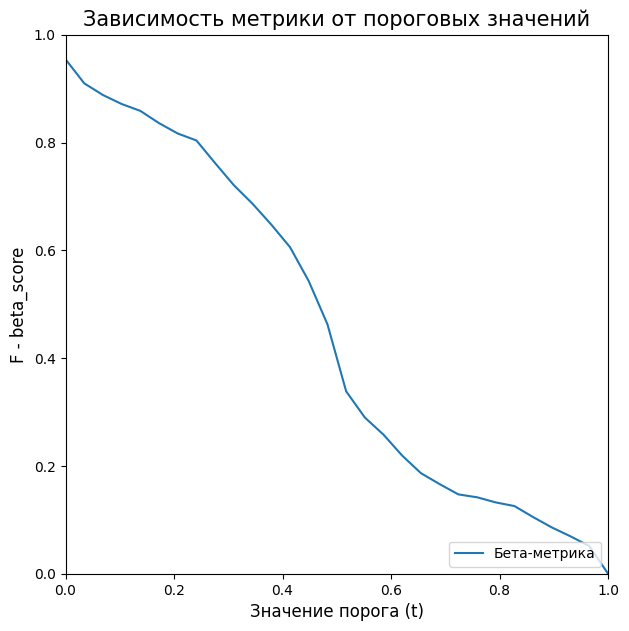

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, label='Бета-метрика')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Зависимость метрики от пороговых значений', size=15)
plt.xlabel('Значение порога (t)', size=12)
plt.ylabel('F - beta_score', size=12)
plt.legend(loc='lower right');

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае логистической регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [ ]:
# Ваш код здесь, сори за циклы, быть может тут и без него можно, но у меня 3 часа до дедлайна...

Coef_2 = LogReg_2.coef_[0]
Gender_0_Coef = []
Gender_1_Coef = []

for i in range(len(Coef_2)):

    if Coef_2[i] < 0:
        Gender_0_Coef.append(n[i])

    else:
        Gender_1_Coef.append(n[i])


In [ ]:
# Ваш код здесь

#Gender_0_Coef, Gender_1_Coef
len(Gender_0_Coef), len(Gender_0_Coef)

(71, 71)

Глядя на результаты, можно сказать, что нулевой гендер - это вероятнее всего девушки, ну а первый - мужские мужчины

В принципе в самих списках признаков я не заметил противоречий с человеческой логикой, что значит - модель как минимум работает

P.s. как ни странно, но признаки поделило поровну

# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__:

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [ ]:
# Ваш код здесь, вообще самый простой, но не действительный способ - не делить выборку, тогда на выходе получим 1:)

rf = RandomForestClassifier() # один из вернейших способов :)

rf.fit(X_train_2, y_train_2)

p_pred = rf.predict_proba(X_test_2)
roc_auc_score(y_test_2, p_pred[:,-1])

0.8227291414542065

Уже выше того, что получилось ранее:)))

Я отчасти опирался на данную статью в хабре, чтобы разобраться, что вообще за зверь такой этот гридсёрч, однако внаглую не копипастил

https://habr.com/ru/companies/otus/articles/698370/

https://youtu.be/Y7SBSlNwJxc

In [ ]:
# попробую совместить его с Гридом, подобрал парамметры вручную, следуя за здравым смыслом

grid_space={'max_depth':[15],
            'n_estimators':[150, 175],
            'max_features':[12, 13],
            'min_samples_leaf':[4, 5, 6],
            'min_samples_split':[5, 6, 7]}


Я постоянно сокращал этот список, т.к. код работал уже по 10 минут на хорошем железе...

<h3> вот так выглядел roc_auc с представленными ниже парамметрами </h3>

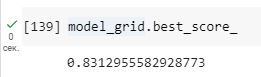

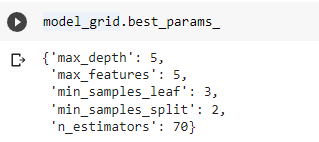

In [ ]:
gr = GridSearchCV(rf, param_grid=grid_space,
                    cv=4, scoring='roc_auc', n_jobs=-1)

model_grid = gr.fit(X_train_2, y_train_2)

In [ ]:
model_grid.best_params_

{'max_depth': 15,
 'max_features': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 150}

In [ ]:
model_grid.best_score_

0.8413250851387581

In [ ]:
# тут я буду копипастить рекорды, можно было бы конечно сделать словарик, но дедлайн через 1,5 часа

#.best_score_
0.8413250851387581

{'max_depth': 15,
 'max_features': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 150}

Увеличение числа оценщиков (N_estimators) и глубины существенно повышают качество модели, однако это также экспоненциально увеличивает время обучения

Исходя из моих э-э-э-э-э-кспериментов, roc_auc данной модели возрастает с ростом её глубины, глубина же в свою очередь тянет остальные параметры за собой, однако вместе с ними возрастает и время работы кода, что в свою очередь сокращает мою нервную систему


В общем, мой лучший результат с определёнными параметрами представлен выше, однако это не предел для "леса", по моим прикидкам он может добить и выше 0,85 , однако боюсь, что старость придёт раньше, чем результаты работы такого кода, что уж говорить о дедлайне, потому имеем, что имеем, и да, я знал про кошачий буст, но сознательно решил его не использовать

https://youtu.be/CxyfnmgQDz0

## <center> Спасибо за просмотр!!! </center>

## <center> До встречи в 4-ом ДЗ </center>


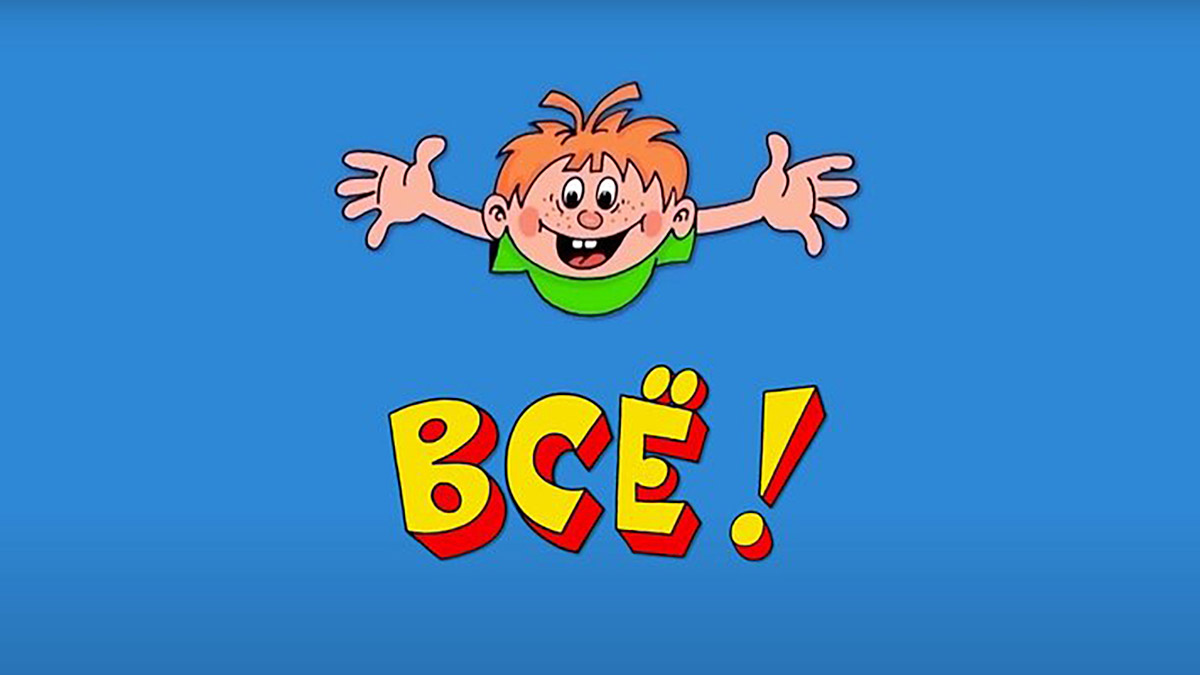